In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [9]:
df = pd.read_excel('diabetes.xlsx')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     627.0   50        1  
1                     351.0   31        0  
2                     672.0   32        1  
3                     167.0   21        0  
4                    2288.0   33        1

/tmp/ipython-input-10-2069544381.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-10-2069544381.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(
/tmp/ipython-input-10-2069544381.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=target)


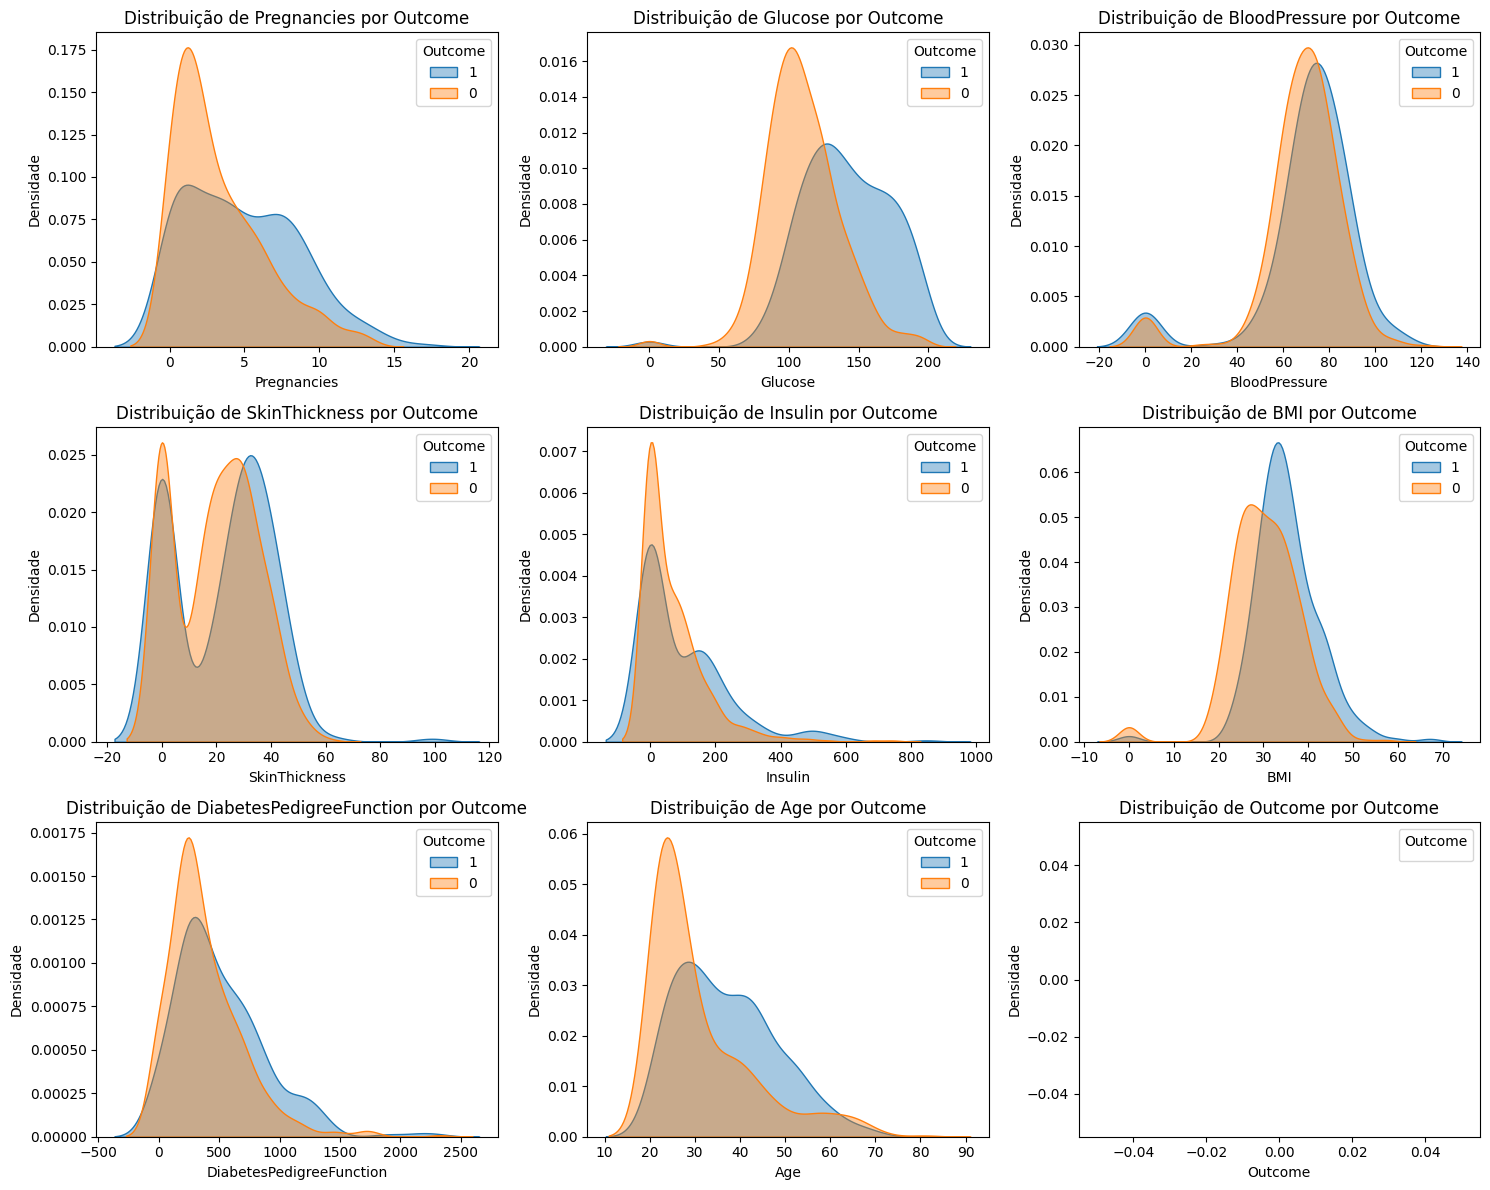

In [10]:

target = 'Outcome'
categorical_target = df[target].unique()

numerical_cols = df.select_dtypes(include=[np.number]).columns

num_cols = len(numerical_cols)

num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, num_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 3, i)

    for category in categorical_target:
        sns.kdeplot(
            data=df[df[target] == category],
            x=col,
            label=str(category),
            fill=True,
            alpha=0.4
        )

    plt.title(f'Distribuição de {col} por {target}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend(title=target)

plt.tight_layout()

plt.show()

/tmp/ipython-input-11-1458609496.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


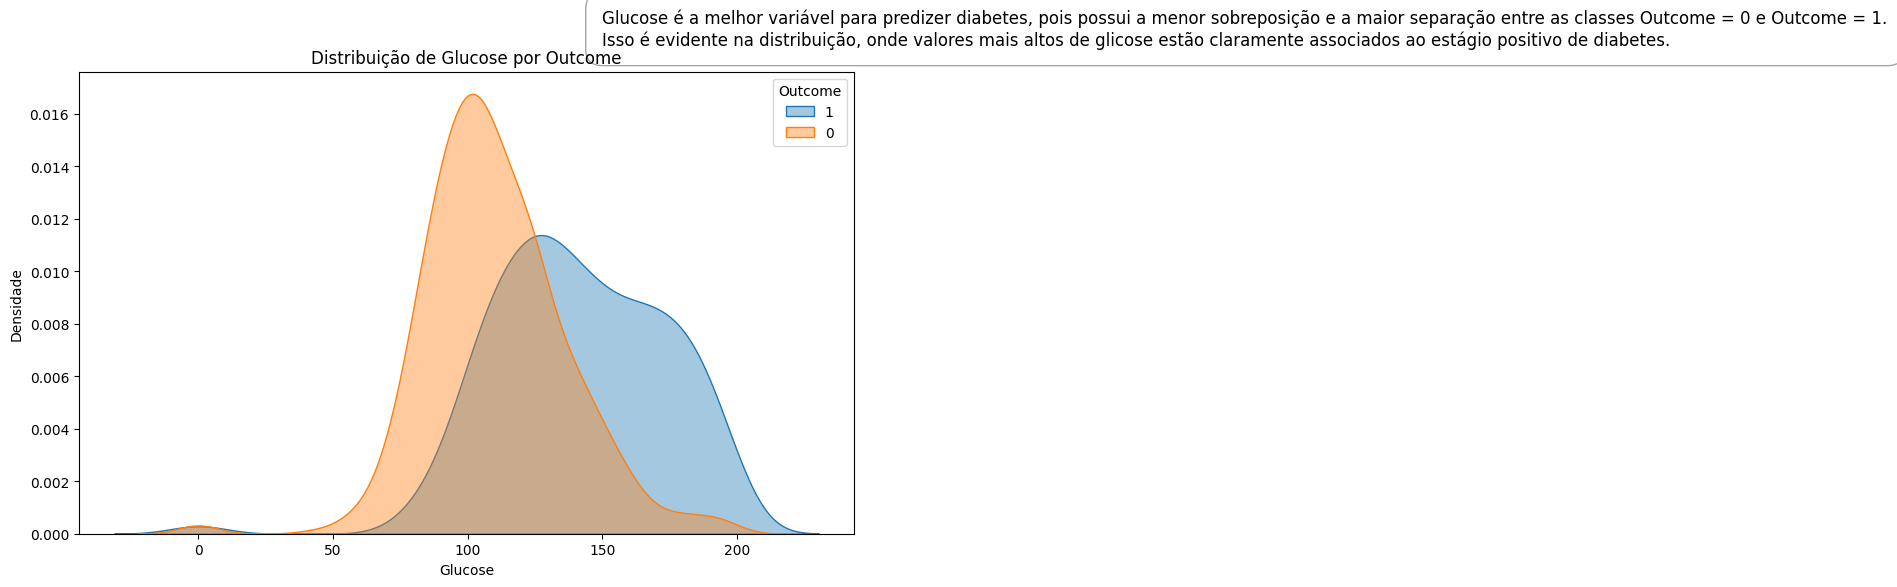

In [11]:
target = 'Outcome'
categorical_target = df[target].unique()

col = 'Glucose'

if col in df.columns:
    plt.figure(figsize=(10, 6))

    for category in categorical_target:
        sns.kdeplot(
            data=df[df[target] == category],
            x=col,
            label=str(category),
            fill=True,
            alpha=0.4
        )

    plt.title(f'Distribuição de {col} por {target}')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend(title=target)

    plt.text(
        x=150,
        y=0.02,
        s="Glucose é a melhor variável para predizer diabetes, pois possui a menor sobreposição e a maior separação entre as classes Outcome = 0 e Outcome = 1.\nIsso é evidente na distribuição, onde valores mais altos de glicose estão claramente associados ao estágio positivo de diabetes.",
        fontsize=12,
        ha='left',
        va='top',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round,pad=1')
    )

    plt.tight_layout()
    plt.show()
else:
    print(f"A coluna '{col}' não existe no DataFrame.")

### A glicose é a variável com a melhor separação entre as classes Outcome = 0 e Outcome = 1, o que a torna a mais relevante para predizer o diabetes

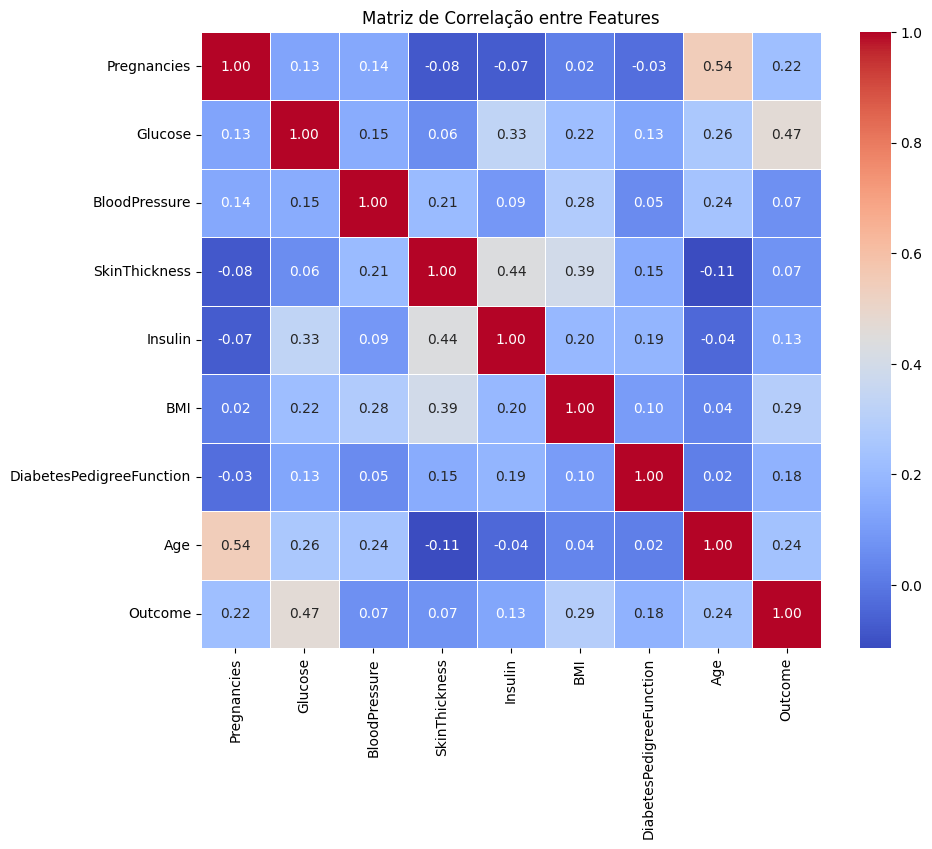

In [12]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Features')
plt.show()

In [13]:
target = 'Outcome'
correlation_with_target = df.corr()[target]
correlation_with_target_sorted = correlation_with_target.abs().sort_values(ascending=False)
print(correlation_with_target_sorted)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.176608
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [14]:
df_Diag = pd.read_excel('datasetCancer1.xlsx')

In [15]:
type(df_Diag)

pandas.core.frame.DataFrame

In [16]:
df_Diag

ID Diagnosis  radius  texture  perimeter    area  smoothness  \
0      842302         M   17.99    10.38     122.80  1001.0     0.11840   
1      842517         M   20.57    17.77     132.90  1326.0     0.08474   
2    84300903         M   19.69    21.25     130.00  1203.0     0.10960   
3    84348301         M   11.42    20.38      77.58   386.1     0.14250   
4    84358402         M   20.29    14.34     135.10  1297.0     0.10030   
..        ...       ...     ...      ...        ...     ...         ...   
564    926424         M   21.56    22.39     142.00  1479.0     0.11100   
565    926682         M   20.13    28.25     131.20  1261.0     0.09780   
566    926954         M   16.60    28.08     108.30   858.1     0.08455   
567    927241         M   20.60    29.33     140.10  1265.0     0.11780   
568     92751         B    7.76    24.54      47.92   181.0     0.05263   

     compactness  concavity  concave_points  symmetry  fractal_dimension  
0        0.27760    0.30010         0.14710    0.2419            0.07871  
1        0.07864    0.08690         0.07017    0.1812            0.05667  
2        0.15990    0.19740         0.12790    0.2069            0.05999  
3        0.28390    0.24140         0.10520    0.2597            0.09744  
4        0.13280    0.19800         0.10430    0.1809            0.05883  
..           ...        ...             ...       ...                ...  
564      0.11590    0.24390         0.13890    0.1726            0.05623  
565      0.10340    0.14400         0.09791    0.1752            0.05533  
566      0.10230    0.09251         0.05302    0.1590            0.05648  
567      0.27700    0.35140         0.15200    0.2397            0.07016  
568      0.04362    0.00000         0.00000    0.1587            0.05884  

[569 rows x 12 columns]

In [17]:
df_Diag.value_counts()

ID         Diagnosis  radius  texture  perimeter  area    smoothness  compactness  concavity  concave_points  symmetry  fractal_dimension
911320502  B          13.17   18.22    84.28      537.3   0.07466     0.05994      0.04859    0.02870         0.1454    0.05549              1
8670       M          15.46   19.48    101.70     748.9   0.10920     0.12230      0.14660    0.08087         0.1931    0.05796              1
8913       B          12.89   13.12    81.89      515.9   0.06955     0.03729      0.02260    0.01171         0.1337    0.05581              1
8915       B          14.96   19.10    97.03      687.3   0.08992     0.09823      0.05940    0.04819         0.1879    0.05852              1
9047       B          12.94   16.17    83.18      507.6   0.09879     0.08836      0.03296    0.02390         0.1735    0.06200              1
                                                                                                                                            ..
87127      B          10.80   9.71     68.77      357.6   0.09594     0.05736      0.02531    0.01698         0.1381    0.06400              1
87106      B          11.15   13.08    70.87      381.9   0.09754     0.05113      0.01982    0.01786         0.1830    0.06105              1
86561      B          13.85   17.21    88.44      588.7   0.08785     0.06136      0.01420    0.01141         0.1614    0.05890              1
86517      M          18.66   17.12    121.40     1077.0  0.10540     0.11000      0.14570    0.08665         0.1966    0.06213              1
86409      B          14.26   19.65    97.83      629.9   0.07837     0.22330      0.30030    0.07798         0.1704    0.07769              1
Name: count, Length: 569, dtype: int64

In [18]:
df_Diag.shape

(569, 12)

In [19]:
df_Diag.shape[0]

569

In [20]:
df_Diag.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [21]:
df_Diag.drop('ID',axis=1, inplace = True)
df_Diag

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0           M   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1           M   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2           M   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3           M   11.42    20.38      77.58   386.1     0.14250      0.28390   
4           M   20.29    14.34     135.10  1297.0     0.10030      0.13280   
..        ...     ...      ...        ...     ...         ...          ...   
564         M   21.56    22.39     142.00  1479.0     0.11100      0.11590   
565         M   20.13    28.25     131.20  1261.0     0.09780      0.10340   
566         M   16.60    28.08     108.30   858.1     0.08455      0.10230   
567         M   20.60    29.33     140.10  1265.0     0.11780      0.27700   
568         B    7.76    24.54      47.92   181.0     0.05263      0.04362   

     concavity  concave_points  symmetry  fractal_dimension  
0      0.30010         0.14710    0.2419            0.07871  
1      0.08690         0.07017    0.1812            0.05667  
2      0.19740         0.12790    0.2069            0.05999  
3      0.24140         0.10520    0.2597            0.09744  
4      0.19800         0.10430    0.1809            0.05883  
..         ...             ...       ...                ...  
564    0.24390         0.13890    0.1726            0.05623  
565    0.14400         0.09791    0.1752            0.05533  
566    0.09251         0.05302    0.1590            0.05648  
567    0.35140         0.15200    0.2397            0.07016  
568    0.00000         0.00000    0.1587            0.05884  

[569 rows x 11 columns]

# Analisar qte de cada classe, médias, variâncias, desvio padrão por classe.

In [22]:
df_Diag.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [23]:
df_Diag[df_Diag.radius >= df_Diag.radius.mean()].Diagnosis.value_counts()

Diagnosis
M    180
B     46
Name: count, dtype: int64

In [24]:
df_Diag[df_Diag.radius < df_Diag.radius.mean()].Diagnosis.value_counts()

Diagnosis
B    311
M     32
Name: count, dtype: int64

In [25]:
df_Diag[df_Diag.radius >= df_Diag.radius.median()].Diagnosis.value_counts()

Diagnosis
M    195
B     90
Name: count, dtype: int64

In [26]:
df_Diag[df_Diag.radius < df_Diag.radius.median()].Diagnosis.value_counts()

Diagnosis
B    267
M     17
Name: count, dtype: int64

In [27]:
print(df_Diag[df_Diag.Diagnosis == 'B'].radius.mean())
print(df_Diag[df_Diag.Diagnosis == 'M'].radius.mean())
print(df_Diag[df_Diag.Diagnosis == 'B'].radius.min())
print(df_Diag[df_Diag.Diagnosis == 'B'].radius.max())
print(df_Diag[df_Diag.Diagnosis == 'M'].radius.min())
print(df_Diag[df_Diag.Diagnosis == 'M'].radius.max())

12.146523809523808
17.462830188679245
6.981
17.85
10.95
28.11


In [28]:
df_Diag[df_Diag.perimeter >= df_Diag.perimeter.mean()].Diagnosis.value_counts()

Diagnosis
M    182
B     44
Name: count, dtype: int64

In [29]:
df_Diag[df_Diag.area >= df_Diag.area.mean()].Diagnosis.value_counts()

Diagnosis
M    171
B     33
Name: count, dtype: int64

In [30]:
df_Diag.columns

Index(['Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [31]:
df_Diag.isna().sum()

Diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave_points       0
symmetry             0
fractal_dimension    0
dtype: int64

In [32]:
df_Diag.isna().sum().mean()

np.float64(0.0)

In [33]:
df_Diag.notna()

Diagnosis  radius  texture  perimeter  area  smoothness  compactness  \
0         True    True     True       True  True        True         True   
1         True    True     True       True  True        True         True   
2         True    True     True       True  True        True         True   
3         True    True     True       True  True        True         True   
4         True    True     True       True  True        True         True   
..         ...     ...      ...        ...   ...         ...          ...   
564       True    True     True       True  True        True         True   
565       True    True     True       True  True        True         True   
566       True    True     True       True  True        True         True   
567       True    True     True       True  True        True         True   
568       True    True     True       True  True        True         True   

     concavity  concave_points  symmetry  fractal_dimension  
0         True            True      True               True  
1         True            True      True               True  
2         True            True      True               True  
3         True            True      True               True  
4         True            True      True               True  
..         ...             ...       ...                ...  
564       True            True      True               True  
565       True            True      True               True  
566       True            True      True               True  
567       True            True      True               True  
568       True            True      True               True  

[569 rows x 11 columns]

In [34]:
df_Diag.notna().sum()

Diagnosis            569
radius               569
texture              569
perimeter            569
area                 569
smoothness           569
compactness          569
concavity            569
concave_points       569
symmetry             569
fractal_dimension    569
dtype: int64

In [35]:
df_Diag.notna().sum().std()

0.0

In [36]:
df_Diag.isna().sum().sum()

np.int64(0)

In [37]:
df_Diag.describe()

radius     texture   perimeter         area  smoothness  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    14.127292   19.289649   91.969033   654.889104    0.096360   
std      3.524049    4.301036   24.298981   351.914129    0.014064   
min      6.981000    9.710000   43.790000   143.500000    0.052630   
25%     11.700000   16.170000   75.170000   420.300000    0.086370   
50%     13.370000   18.840000   86.240000   551.100000    0.095870   
75%     15.780000   21.800000  104.100000   782.700000    0.105300   
max     28.110000   39.280000  188.500000  2501.000000    0.163400   

       compactness   concavity  concave_points    symmetry  fractal_dimension  
count   569.000000  569.000000      569.000000  569.000000         569.000000  
mean      0.104341    0.088799        0.048919    0.181162           0.062798  
std       0.052813    0.079720        0.038803    0.027414           0.007060  
min       0.019380    0.000000        0.000000    0.106000           0.049960  
25%       0.064920    0.029560        0.020310    0.161900           0.057700  
50%       0.092630    0.061540        0.033500    0.179200           0.061540  
75%       0.130400    0.130700        0.074000    0.195700           0.066120  
max       0.345400    0.426800        0.201200    0.304000           0.097440

# Primeiro quartil

In [38]:
df_Diag[df_Diag.radius <= 11.7].radius.count()/569 * 100

np.float64(25.13181019332162)

# Terceiro Quartil

In [39]:
df_Diag[df_Diag.radius > 15.78].radius.count()/569 * 100

np.float64(24.956063268892795)

In [40]:
df_Diag.radius.median()

13.37

In [41]:
(df_Diag[df_Diag.radius <= 11.7].radius.count())/df_Diag.shape[0]

np.float64(0.2513181019332162)

In [42]:
(df_Diag[df_Diag.radius <= 15.78].radius.count())/df_Diag.shape[0]

np.float64(0.7504393673110721)

In [43]:
df_Diag.radius.std()/df_Diag.radius.mean()

np.float64(0.24944970990160792)

In [44]:
df_Diag.perimeter.std()/df_Diag.perimeter.mean()

np.float64(0.26420828992740997)

In [45]:
df_Diag.area.std()/df_Diag.area.mean()

np.float64(0.537364459415204)

In [46]:
df_Diag.concavity.std()/df_Diag.concavity.mean()

np.float64(0.89775251052589)

In [47]:
df_Diag[df_Diag.concavity >= df_Diag.concavity.mean()].Diagnosis.value_counts()

Diagnosis
M    184
B     38
Name: count, dtype: int64

In [48]:
df_Diag[df_Diag.concavity < df_Diag.concavity.mean()].Diagnosis.value_counts()

Diagnosis
B    319
M     28
Name: count, dtype: int64

In [49]:
df_Diag[df_Diag.fractal_dimension < df_Diag.fractal_dimension.mean()].Diagnosis.value_counts()

Diagnosis
B    205
M    123
Name: count, dtype: int64

In [50]:
df_Diag.drop('Diagnosis', axis=1).columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [51]:
for features in df_Diag.drop('Diagnosis', axis=1).columns:
  up = df_Diag[df_Diag[features] >= df_Diag[features].mean()].Diagnosis.value_counts()
  down = df_Diag[df_Diag[features] < df_Diag[features].mean()].Diagnosis.value_counts()
  print(f'*****{features}***** ')
  print('UP')
  print(up)
  print('DOWN')
  print(down)
  print('---------------------------------')

*****radius***** 
UP
Diagnosis
M    180
B     46
Name: count, dtype: int64
DOWN
Diagnosis
B    311
M     32
Name: count, dtype: int64
---------------------------------
*****texture***** 
UP
Diagnosis
M    160
B    103
Name: count, dtype: int64
DOWN
Diagnosis
B    254
M     52
Name: count, dtype: int64
---------------------------------
*****perimeter***** 
UP
Diagnosis
M    182
B     44
Name: count, dtype: int64
DOWN
Diagnosis
B    313
M     30
Name: count, dtype: int64
---------------------------------
*****area***** 
UP
Diagnosis
M    171
B     33
Name: count, dtype: int64
DOWN
Diagnosis
B    324
M     41
Name: count, dtype: int64
---------------------------------
*****smoothness***** 
UP
Diagnosis
M    145
B    135
Name: count, dtype: int64
DOWN
Diagnosis
B    222
M     67
Name: count, dtype: int64
---------------------------------
*****compactness***** 
UP
Diagnosis
M    168
B     75
Name: count, dtype: int64
DOWN
Diagnosis
B    282
M     44
Name: count, dtype: int64
---------------

In [52]:
for features in df_Diag.drop('Diagnosis', axis=1).columns:
  b = df_Diag[df_Diag['Diagnosis'] == 'B'][features].mean()
  m = df_Diag[df_Diag['Diagnosis'] == 'M'][features].mean()
  print(f'{features} B: {b} - M: {m} ')

radius B: 12.146523809523808 - M: 17.462830188679245 
texture B: 17.914761904761903 - M: 21.60490566037736 
perimeter B: 78.075406162465 - M: 115.36537735849056 
area B: 462.7901960784313 - M: 978.3764150943397 
smoothness B: 0.09247764705882354 - M: 0.10289849056603775 
compactness B: 0.0800846218487395 - M: 0.14518778301886792 
concavity B: 0.04605762100840336 - M: 0.16077471698113208 
concave_points B: 0.025717406162464984 - M: 0.08799 
symmetry B: 0.1741859943977591 - M: 0.1929089622641509 
fractal_dimension B: 0.0628673949579832 - M: 0.06268009433962264 


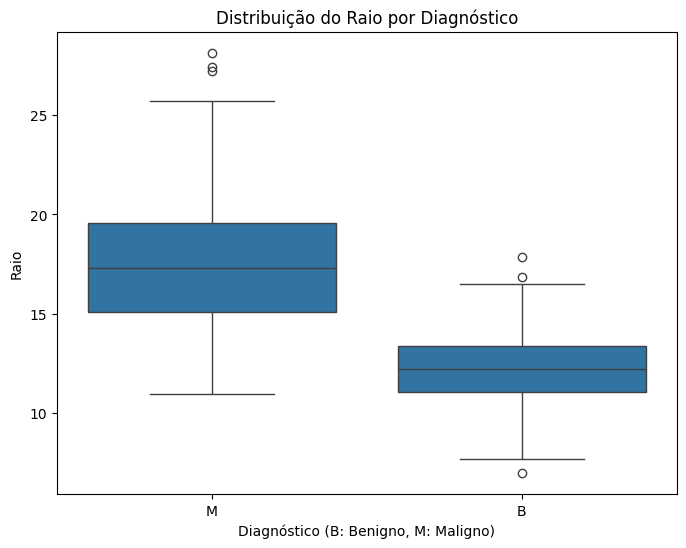

In [53]:
# prompt: gere um gráfico boxplot da distribuição do radius separando B e M do diagnosis

plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='radius', data=df_Diag)
plt.title('Distribuição do Raio por Diagnóstico')
plt.xlabel('Diagnóstico (B: Benigno, M: Maligno)')
plt.ylabel('Raio')
plt.show()


In [54]:
df_Diag[df_Diag.Diagnosis == 'M'].radius.min()

10.95

In [55]:
Q3 = df_Diag[df_Diag.Diagnosis == 'M'].radius.quantile(0.75)
Q1 = df_Diag[df_Diag.Diagnosis == 'M'].radius.quantile(0.25)
IQR = Q3 - Q1
whisker_superior = Q3 + 1.5 * IQR
whisker_inferior = Q1 - 1.5 * IQR
whisker_superior,whisker_inferior

(np.float64(26.3625), np.float64(8.302499999999998))

In [56]:
Q3 = df_Diag[df_Diag.Diagnosis == 'B'].radius.quantile(0.75)
Q1 = df_Diag[df_Diag.Diagnosis == 'B'].radius.quantile(0.25)
IQR = Q3 - Q1
whisker_superior = Q3 + 1.5 * IQR
whisker_inferior = Q1 - 1.5 * IQR
whisker_superior,whisker_inferior

(np.float64(16.805), np.float64(7.645000000000001))

In [57]:
df_Diag[df_Diag.Diagnosis == 'B'].radius.min()

6.981

In [58]:
df_Diag.drop('Diagnosis', axis=1).columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension'],
      dtype='object')

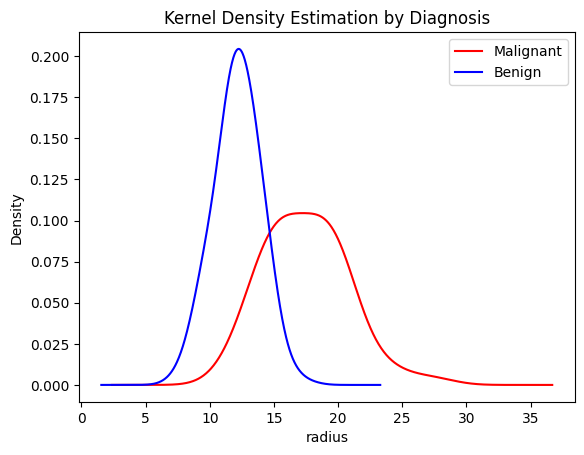

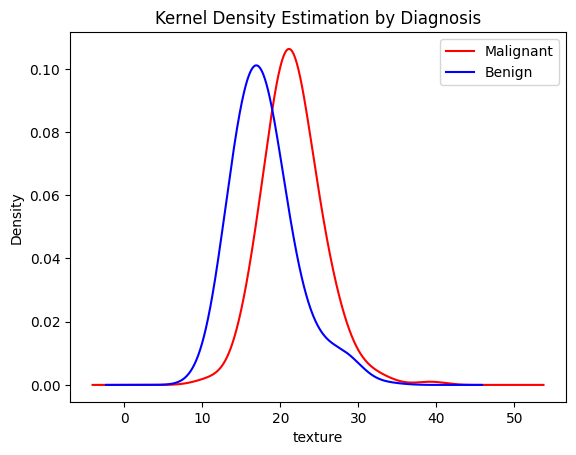

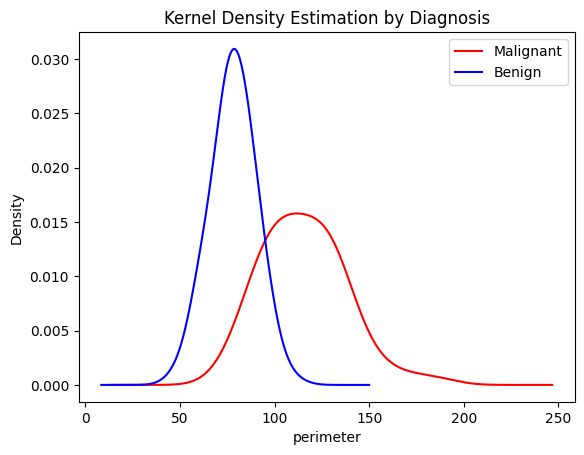

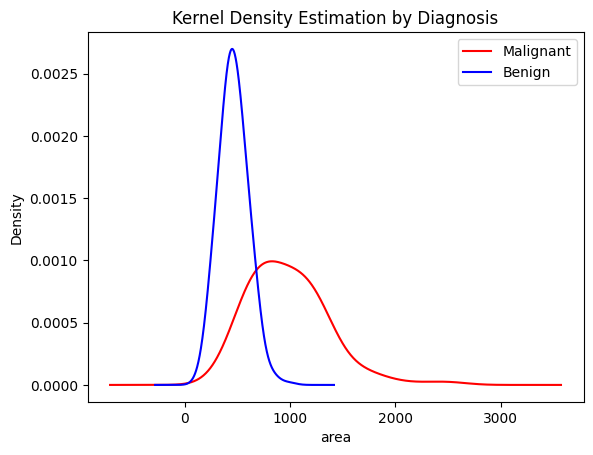

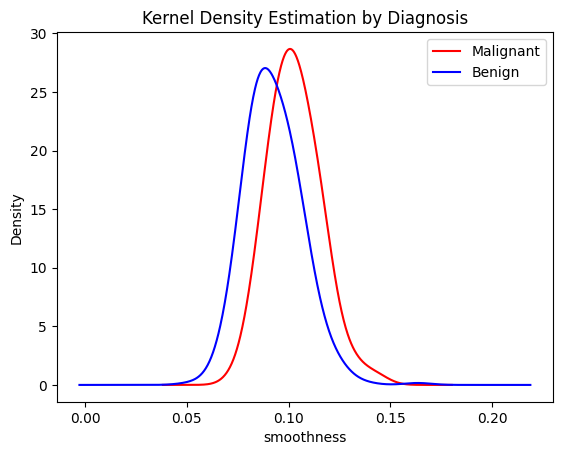

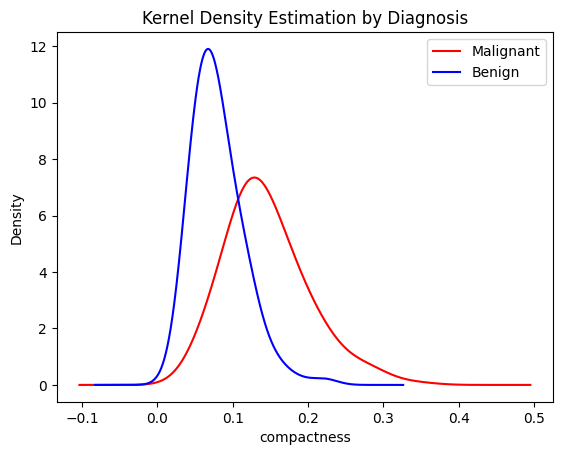

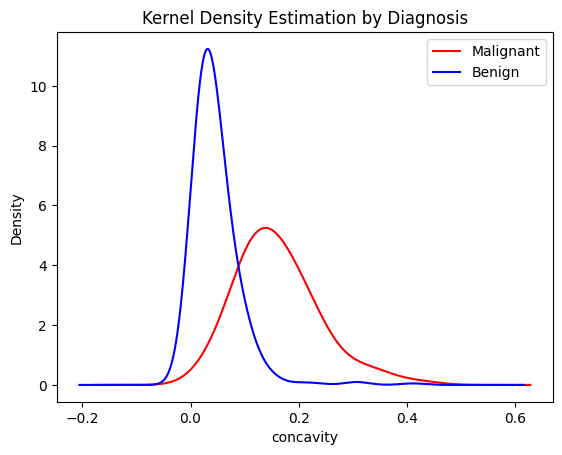

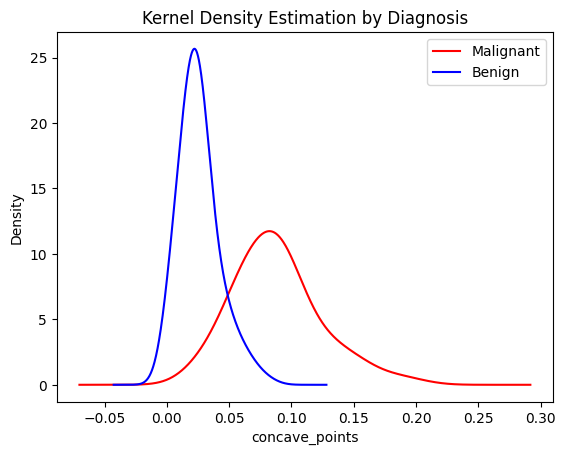

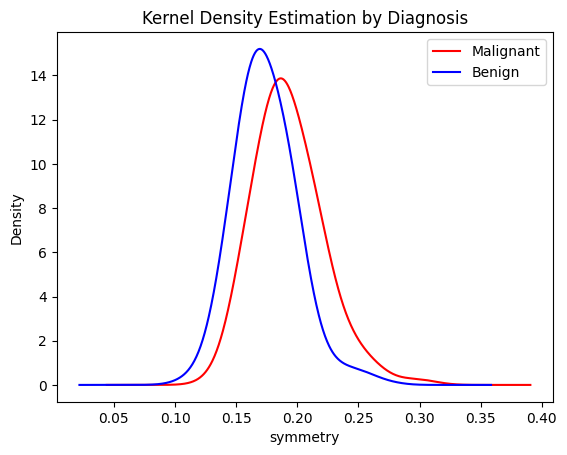

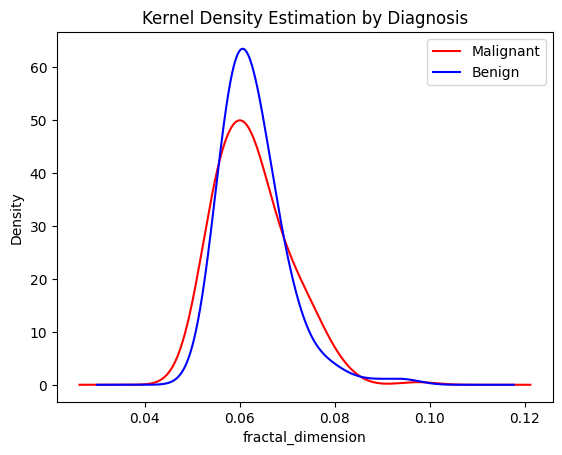

In [59]:
for features in df_Diag.drop('Diagnosis', axis=1).columns:

  # Plotar KDE para 'M' com cor vermelha
  df_Diag[df_Diag['Diagnosis'] == 'M'][features].plot.kde(bw_method=0.5, color='red', label='Malignant')


  # Plotar KDE para 'B' com cor azul
  df_Diag[df_Diag['Diagnosis'] == 'B'][features].plot.kde(bw_method=0.5, color='blue', label='Benign')

  # Configurar rótulos, título e legenda
  #plt.vlines(df_Diag[df_Diag['Diagnosis'] == 'B'][features].mean(), 0, 0.1 , linestyles ="dotted", colors ="green")
  plt.xlabel(features)
  plt.ylabel('Density')
  plt.title('Kernel Density Estimation by Diagnosis')
  plt.legend()

  # Exibir o gráfico
  plt.show()


# Faça uma interpretação do KDE

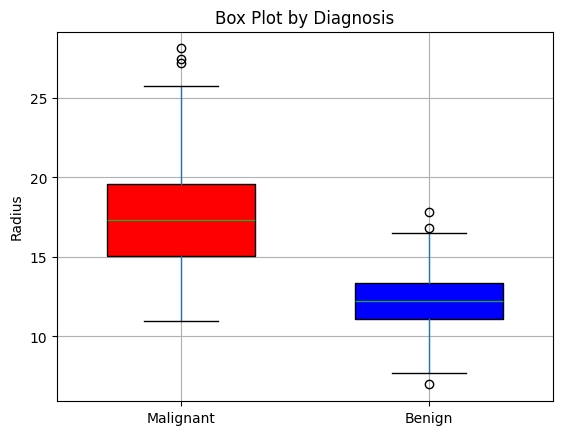

In [60]:
# Crie uma figura e eixo
fig, ax = plt.subplots()

# Plotar Boxplot para 'M' com cor vermelha
df_Diag[df_Diag['Diagnosis'] == 'M'].boxplot(column='radius', ax=ax, positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'))

# Plotar Boxplot para 'B' com cor azul
df_Diag[df_Diag['Diagnosis'] == 'B'].boxplot(column='radius', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'))

# Configurar rótulos, título e eixo x
ax.set_xticks([0, 1])
ax.set_xticklabels(['Malignant', 'Benign'])
ax.set_ylabel('Radius')
ax.set_title('Box Plot by Diagnosis')

# Exibir o gráfico
plt.show()



In [61]:
df_Diag['Diagnosis'] == 'B'

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: Diagnosis, Length: 569, dtype: bool

In [62]:
whisker_superior,whisker_inferior

(np.float64(16.805), np.float64(7.645000000000001))

In [63]:
index_outliers_sup =  df_Diag[(df_Diag['Diagnosis'] == 'B') & (df_Diag['radius'] > whisker_superior)].index
index_outliers_inf =  df_Diag[(df_Diag['Diagnosis'] == 'B') & (df_Diag['radius'] < whisker_inferior)].index

In [64]:
df_Diag.loc[index_outliers_sup]

Diagnosis  radius  texture  perimeter   area  smoothness  compactness  \
157         B   16.84    19.46      108.4  880.2     0.07445      0.07223   
491         B   17.85    13.23      114.6  992.1     0.07838      0.06217   

     concavity  concave_points  symmetry  fractal_dimension  
157    0.05150         0.02771    0.1844            0.05268  
491    0.04445         0.04178    0.1220            0.05243

In [65]:
df_Diag.loc[index_outliers_inf]

Diagnosis  radius  texture  perimeter   area  smoothness  compactness  \
101         B   6.981    13.43      43.79  143.5       0.117      0.07568   

     concavity  concave_points  symmetry  fractal_dimension  
101        0.0             0.0     0.193            0.07818

In [66]:
indexmeu = df_Diag.radius>25

In [67]:
indexmeu[180]

np.True_

In [68]:
df_Diag[indexmeu]

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
82          M   25.22    24.91      171.5  1878.0      0.1063       0.2665   
180         M   27.22    21.87      182.1  2250.0      0.1094       0.1914   
212         M   28.11    18.47      188.5  2499.0      0.1142       0.1516   
352         M   25.73    17.46      174.2  2010.0      0.1149       0.2363   
461         M   27.42    26.27      186.9  2501.0      0.1084       0.1988   

     concavity  concave_points  symmetry  fractal_dimension  
82      0.3339          0.1845    0.1829            0.06782  
180     0.2871          0.1878    0.1800            0.05770  
212     0.3201          0.1595    0.1648            0.05525  
352     0.3368          0.1913    0.1956            0.06121  
461     0.3635          0.1689    0.2061            0.05623

In [69]:
df_Diag.iloc[[82,180,212,352,461],[0,1,2,3,4]]

Diagnosis  radius  texture  perimeter    area
82          M   25.22    24.91      171.5  1878.0
180         M   27.22    21.87      182.1  2250.0
212         M   28.11    18.47      188.5  2499.0
352         M   25.73    17.46      174.2  2010.0
461         M   27.42    26.27      186.9  2501.0

In [70]:
df_Diag.loc[[82,180,212,352,461],['radius','perimeter']]

radius  perimeter
82    25.22      171.5
180   27.22      182.1
212   28.11      188.5
352   25.73      174.2
461   27.42      186.9

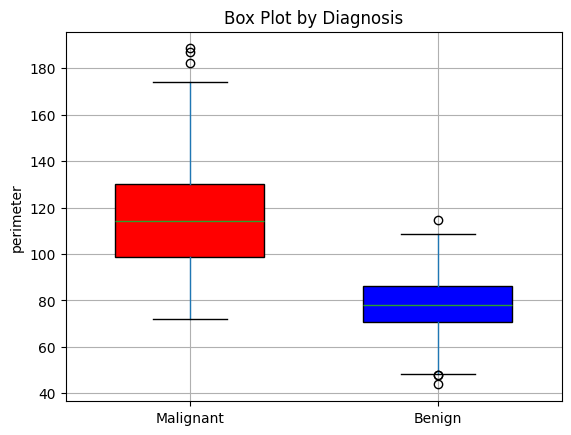

In [71]:
# Crie uma figura e eixo
fig, ax = plt.subplots()

# Plotar Boxplot para 'M' com cor vermelha
df_Diag[df_Diag['Diagnosis'] == 'M'].boxplot(column='perimeter', ax=ax, positions=[0], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'))

# Plotar Boxplot para 'B' com cor azul
df_Diag[df_Diag['Diagnosis'] == 'B'].boxplot(column='perimeter', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'))

# Configurar rótulos, título e eixo x
ax.set_xticks([0, 1])
ax.set_xticklabels(['Malignant', 'Benign'])
ax.set_ylabel('perimeter')
ax.set_title('Box Plot by Diagnosis')

# Exibir o gráfico
plt.show()

In [72]:
df_Diag.loc[df_Diag[df_Diag.radius>whisker_superior].index,['radius','perimeter']]

radius  perimeter
0     17.99      122.8
1     20.57      132.9
2     19.69      130.0
4     20.29      135.1
6     18.25      119.6
..      ...        ...
535   20.55      137.8
563   20.92      143.0
564   21.56      142.0
565   20.13      131.2
567   20.60      140.1

[119 rows x 2 columns]

# Faça uma rotina para mostrar os outliers e extraí-los do dataframe


In [73]:
df_Diag

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
0           M   17.99    10.38     122.80  1001.0     0.11840      0.27760   
1           M   20.57    17.77     132.90  1326.0     0.08474      0.07864   
2           M   19.69    21.25     130.00  1203.0     0.10960      0.15990   
3           M   11.42    20.38      77.58   386.1     0.14250      0.28390   
4           M   20.29    14.34     135.10  1297.0     0.10030      0.13280   
..        ...     ...      ...        ...     ...         ...          ...   
564         M   21.56    22.39     142.00  1479.0     0.11100      0.11590   
565         M   20.13    28.25     131.20  1261.0     0.09780      0.10340   
566         M   16.60    28.08     108.30   858.1     0.08455      0.10230   
567         M   20.60    29.33     140.10  1265.0     0.11780      0.27700   
568         B    7.76    24.54      47.92   181.0     0.05263      0.04362   

     concavity  concave_points  symmetry  fractal_dimension  
0      0.30010         0.14710    0.2419            0.07871  
1      0.08690         0.07017    0.1812            0.05667  
2      0.19740         0.12790    0.2069            0.05999  
3      0.24140         0.10520    0.2597            0.09744  
4      0.19800         0.10430    0.1809            0.05883  
..         ...             ...       ...                ...  
564    0.24390         0.13890    0.1726            0.05623  
565    0.14400         0.09791    0.1752            0.05533  
566    0.09251         0.05302    0.1590            0.05648  
567    0.35140         0.15200    0.2397            0.07016  
568    0.00000         0.00000    0.1587            0.05884  

[569 rows x 11 columns]

In [74]:
# Calcular quartis
data = df_Diag.radius
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calcular intervalo interquartil (IQR)
IQR = Q3 - Q1

# Definir fator para estender os whiskers (geralmente 1.5)
fator = 1.5

# Calcular valores dos whiskers
whisker_inferior = Q1 - fator * IQR
whisker_superior = Q3 + fator * IQR

print("Whisker Inferior:", whisker_inferior)
print("Whisker Superior:", whisker_superior)
#Neste exemplo, o cálculo dos valores dos whiskers é feito usando a mediana (Q1) e o terceiro quartil (Q3) dos dados, juntamente com o intervalo interquartil (IQR) multiplicado por um fator (1.5). Isso determina até onde as hastes devem se estender nos box plots. Certifique-se de substituir data pelos seus próprios dados.


Whisker Inferior: 5.579999999999999
Whisker Superior: 21.9


In [75]:
df_Diag.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [76]:
df_Diag[(df_Diag.radius > whisker_superior) | (df_Diag.radius < whisker_inferior) ]

Diagnosis  radius  texture  perimeter    area  smoothness  compactness  \
82          M   25.22    24.91      171.5  1878.0     0.10630       0.2665   
108         M   22.27    19.67      152.8  1509.0     0.13260       0.2768   
122         M   24.25    20.20      166.2  1761.0     0.14470       0.2867   
164         M   23.27    22.04      152.1  1686.0     0.08439       0.1145   
180         M   27.22    21.87      182.1  2250.0     0.10940       0.1914   
202         M   23.29    26.67      158.9  1685.0     0.11410       0.2084   
212         M   28.11    18.47      188.5  2499.0     0.11420       0.1516   
236         M   23.21    26.97      153.5  1670.0     0.09509       0.1682   
339         M   23.51    24.27      155.1  1747.0     0.10690       0.1283   
352         M   25.73    17.46      174.2  2010.0     0.11490       0.2363   
369         M   22.01    21.90      147.2  1482.0     0.10630       0.1954   
461         M   27.42    26.27      186.9  2501.0     0.10840       0.1988   
503         M   23.09    19.83      152.1  1682.0     0.09342       0.1275   
521         M   24.63    21.60      165.5  1841.0     0.10300       0.2106   

     concavity  concave_points  symmetry  fractal_dimension  
82      0.3339         0.18450    0.1829            0.06782  
108     0.4264         0.18230    0.2556            0.07039  
122     0.4268         0.20120    0.2655            0.06877  
164     0.1324         0.09702    0.1801            0.05553  
180     0.2871         0.18780    0.1800            0.05770  
202     0.3523         0.16200    0.2200            0.06229  
212     0.3201         0.15950    0.1648            0.05525  
236     0.1950         0.12370    0.1909            0.06309  
339     0.2308         0.14100    0.1797            0.05506  
352     0.3368         0.19130    0.1956            0.06121  
369     0.2448         0.15010    0.1824            0.06140  
461     0.3635         0.16890    0.2061            0.05623  
503     0.1676         0.10030    0.1505            0.05484  
521     0.2310         0.14710    0.1991            0.06739

In [77]:
df_Diag.columns

Index(['Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness',
       'compactness', 'concavity', 'concave_points', 'symmetry',
       'fractal_dimension'],
      dtype='object')

In [78]:
df_Diag[['radius','perimeter']]

radius  perimeter
0     17.99     122.80
1     20.57     132.90
2     19.69     130.00
3     11.42      77.58
4     20.29     135.10
..      ...        ...
564   21.56     142.00
565   20.13     131.20
566   16.60     108.30
567   20.60     140.10
568    7.76      47.92

[569 rows x 2 columns]

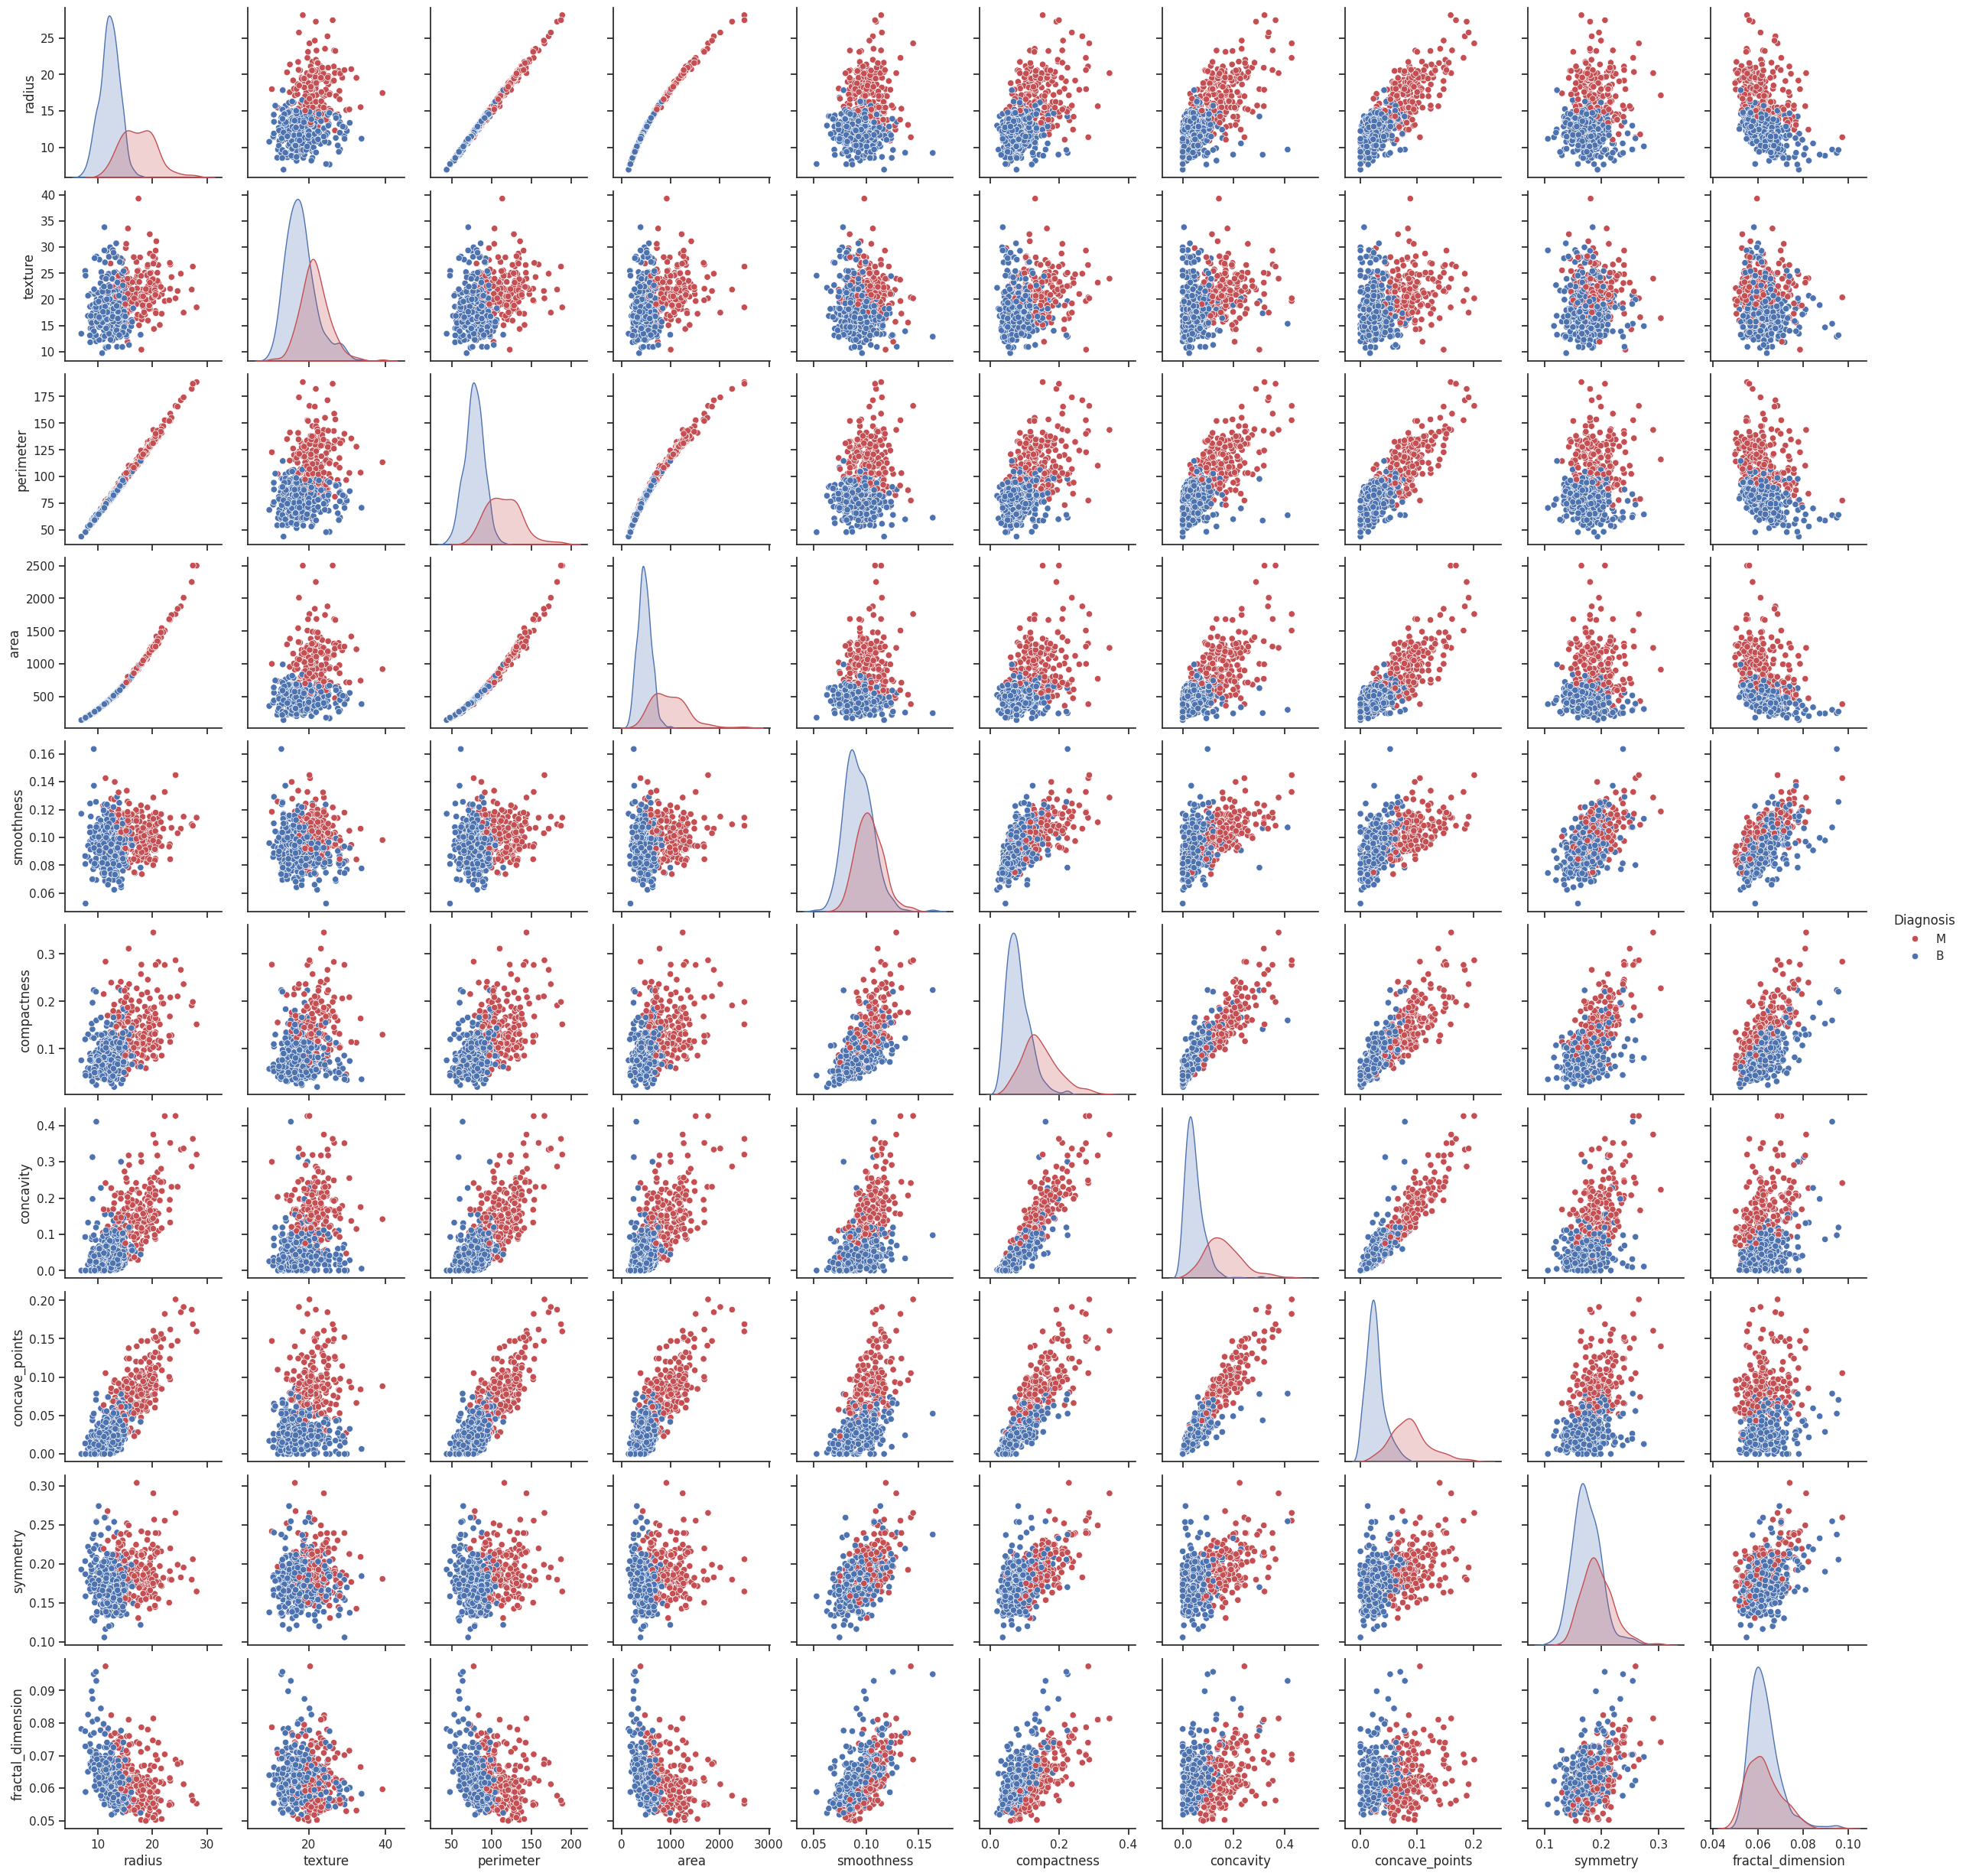

In [79]:
sns.set(style = 'ticks')
sns.pairplot(df_Diag, palette= ('r','b'), hue = 'Diagnosis')
plt.show()

# Analisando estatísticas de primeira e segunda ordem.

In [80]:
df_Diag.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [81]:
df_Diag[df_Diag.Diagnosis == 'M'].describe(),df_Diag[df_Diag.Diagnosis == 'B'].describe()

(           radius     texture   perimeter         area  smoothness  \
 count  212.000000  212.000000  212.000000   212.000000  212.000000   
 mean    17.462830   21.604906  115.365377   978.376415    0.102898   
 std      3.203971    3.779470   21.854653   367.937978    0.012608   
 min     10.950000   10.380000   71.900000   361.600000    0.073710   
 25%     15.075000   19.327500   98.745000   705.300000    0.094010   
 50%     17.325000   21.460000  114.200000   932.000000    0.102200   
 75%     19.590000   23.765000  129.925000  1203.750000    0.110925   
 max     28.110000   39.280000  188.500000  2501.000000    0.144700   
 
        compactness   concavity  concave_points    symmetry  fractal_dimension  
 count   212.000000  212.000000      212.000000  212.000000         212.000000  
 mean      0.145188    0.160775        0.087990    0.192909           0.062680  
 std       0.053987    0.075019        0.034374    0.027638           0.007573  
 min       0.046050    0.023980    

In [82]:
media = df_Diag['radius'].mean()
desvio_padrao = df_Diag['radius'].std()
coef_variacao = (desvio_padrao / media) * 100
print(f"Coeficiente de Variação: {coef_variacao:.2f}%")

# Calcular o Desvio Absoluto Médio (Mean Absolute Deviation - MAD)
desvio_absoluto = abs(df_Diag['radius'] - media)
mad = desvio_absoluto.mean()
print(f"Desvio Absoluto Médio (MAD): {mad:.2f}")

Coeficiente de Variação: 24.94%
Desvio Absoluto Médio (MAD): 2.75


# Skewness e Kurtosis

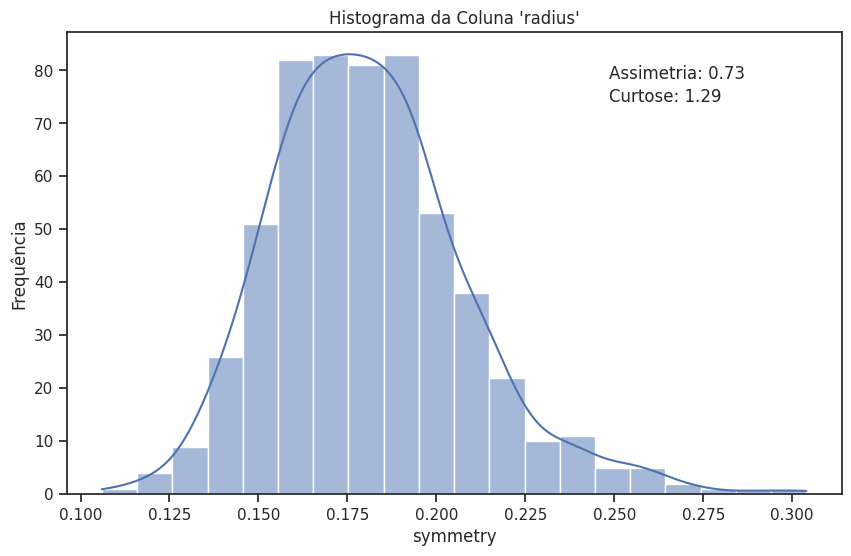

In [83]:
# Calculo a assimetria (skewness) e curtose (kurtosis)
assimetria = df_Diag['symmetry'].skew()
curtose = df_Diag['symmetry'].kurtosis()

# Plotando um histograma da coluna "radius"
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Diag, x='symmetry', bins=20, kde=True)
plt.title("Histograma da Coluna 'radius'")
plt.xlabel("symmetry")
plt.ylabel("Frequência")

# Exibindo os valores de assimetria e curtose no gráfico
plt.text(0.7, 0.9, f"Assimetria: {assimetria:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f"Curtose: {curtose:.2f}", transform=plt.gca().transAxes)

plt.show()

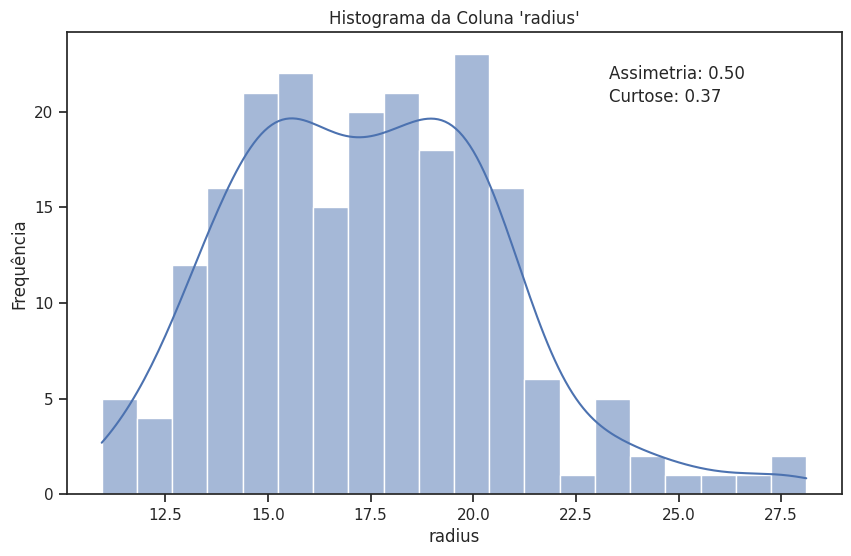

In [84]:
# Calculo a assimetria (skewness) e curtose (kurtosis)
assimetria = df_Diag[df_Diag.Diagnosis =='M' ]['radius'].skew()
curtose = df_Diag[df_Diag.Diagnosis =='M' ]['radius'].kurtosis()

# Plotando um histograma da coluna "radius"
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Diag[df_Diag.Diagnosis =='M' ], x='radius', bins=20, kde=True)
plt.title("Histograma da Coluna 'radius'")
plt.xlabel("radius")
plt.ylabel("Frequência")

# Exibindo os valores de assimetria e curtose no gráfico
plt.text(0.7, 0.9, f"Assimetria: {assimetria:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f"Curtose: {curtose:.2f}", transform=plt.gca().transAxes)

plt.show()

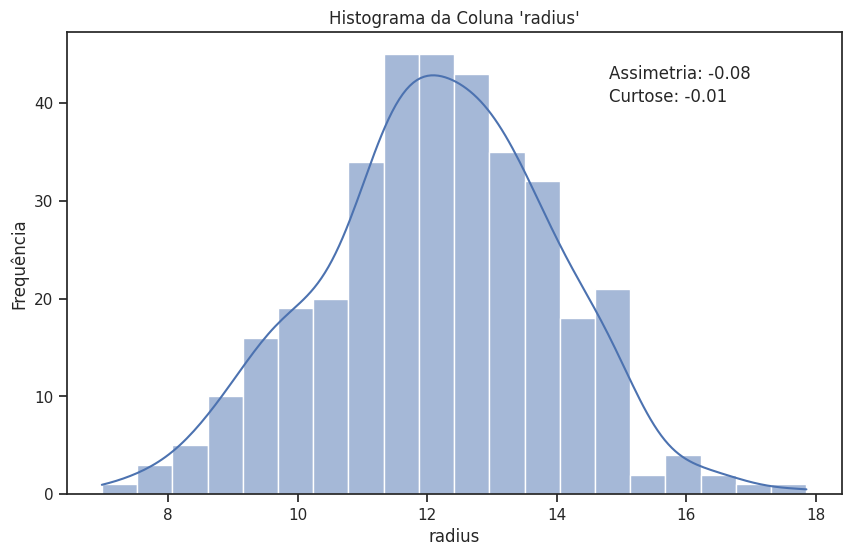

In [85]:
# Calculo a assimetria (skewness) e curtose (kurtosis)
assimetria = df_Diag[df_Diag.Diagnosis =='B' ]['radius'].skew()
curtose = df_Diag[df_Diag.Diagnosis =='B' ]['radius'].kurtosis()

# Plotando um histograma da coluna "radius"
plt.figure(figsize=(10, 6))
sns.histplot(data=df_Diag[df_Diag.Diagnosis =='B' ], x='radius', bins=20, kde=True)
plt.title("Histograma da Coluna 'radius'")
plt.xlabel("radius")
plt.ylabel("Frequência")

# Exibindo os valores de assimetria e curtose no gráfico
plt.text(0.7, 0.9, f"Assimetria: {assimetria:.2f}", transform=plt.gca().transAxes)
plt.text(0.7, 0.85, f"Curtose: {curtose:.2f}", transform=plt.gca().transAxes)

plt.show()

In [86]:
df_Diag['Target'] = df_Diag.Diagnosis.map({'B':0 , 'M':1})

In [87]:
df_Diag.drop('Diagnosis', axis=1, inplace=True)
#df_Diag.drop(columns=['Diagnosis'],inplace=True)  Faz a mesma ação que o código acima

In [88]:
df_Diag

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     17.99    10.38     122.80  1001.0     0.11840      0.27760    0.30010   
1     20.57    17.77     132.90  1326.0     0.08474      0.07864    0.08690   
2     19.69    21.25     130.00  1203.0     0.10960      0.15990    0.19740   
3     11.42    20.38      77.58   386.1     0.14250      0.28390    0.24140   
4     20.29    14.34     135.10  1297.0     0.10030      0.13280    0.19800   
..      ...      ...        ...     ...         ...          ...        ...   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   
568    7.76    24.54      47.92   181.0     0.05263      0.04362    0.00000   

     concave_points  symmetry  fractal_dimension  Target  
0           0.14710    0.2419            0.07871       1  
1           0.07017    0.1812            0.05667       1  
2           0.12790    0.2069            0.05999       1  
3           0.10520    0.2597            0.09744       1  
4           0.10430    0.1809            0.05883       1  
..              ...       ...                ...     ...  
564         0.13890    0.1726            0.05623       1  
565         0.09791    0.1752            0.05533       1  
566         0.05302    0.1590            0.05648       1  
567         0.15200    0.2397            0.07016       1  
568         0.00000    0.1587            0.05884       0  

[569 rows x 11 columns]

# correlação

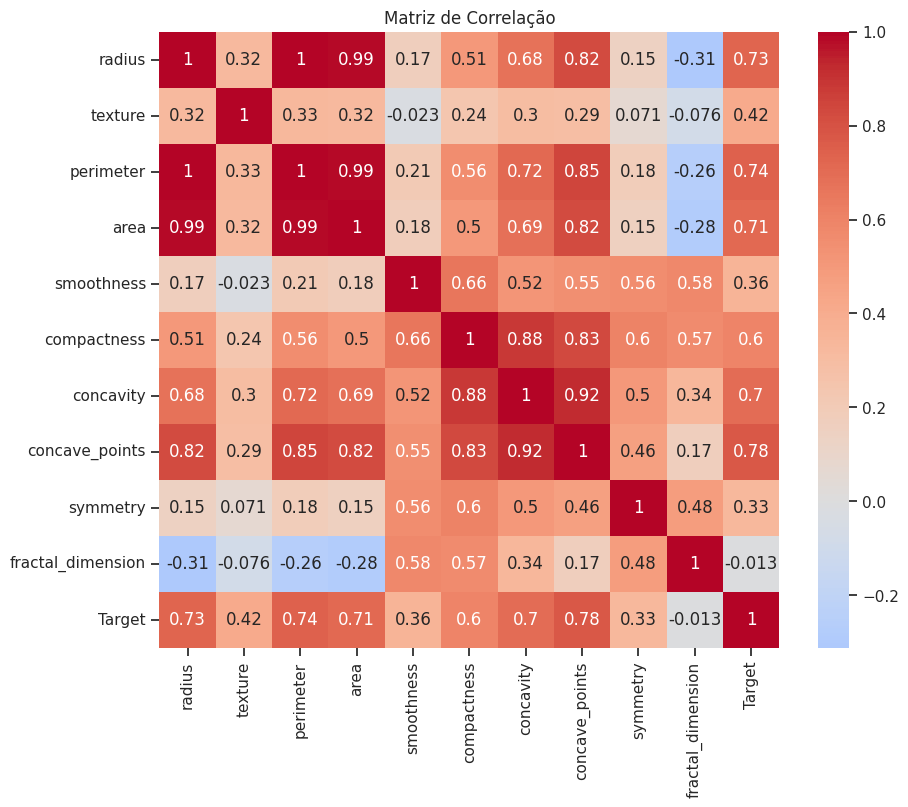

In [89]:
correlation_matrix = df_Diag.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

# Preparar os dados para o algorítmo

# Função   f(x) = 2x +4 ou y = 2x + 4  2 coef. angula e 4 termo independente

---



# ML        c1 * radius + c2 * perimeter + c3 * concavity + ... + c_n * feature_n = target

treinado    0.45 * radius + 1.2 * perimeter....

2x + y = 7

x + y = 5

x = 2  e y = 3

In [90]:
X = df_Diag.drop('Target', axis = 1)

y = df_Diag.Target.copy()


In [91]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [92]:
X

radius  texture  perimeter    area  smoothness  compactness  concavity  \
0     17.99    10.38     122.80  1001.0     0.11840      0.27760    0.30010   
1     20.57    17.77     132.90  1326.0     0.08474      0.07864    0.08690   
2     19.69    21.25     130.00  1203.0     0.10960      0.15990    0.19740   
3     11.42    20.38      77.58   386.1     0.14250      0.28390    0.24140   
4     20.29    14.34     135.10  1297.0     0.10030      0.13280    0.19800   
..      ...      ...        ...     ...         ...          ...        ...   
564   21.56    22.39     142.00  1479.0     0.11100      0.11590    0.24390   
565   20.13    28.25     131.20  1261.0     0.09780      0.10340    0.14400   
566   16.60    28.08     108.30   858.1     0.08455      0.10230    0.09251   
567   20.60    29.33     140.10  1265.0     0.11780      0.27700    0.35140   
568    7.76    24.54      47.92   181.0     0.05263      0.04362    0.00000   

     concave_points  symmetry  fractal_dimension  
0           0.14710    0.2419            0.07871  
1           0.07017    0.1812            0.05667  
2           0.12790    0.2069            0.05999  
3           0.10520    0.2597            0.09744  
4           0.10430    0.1809            0.05883  
..              ...       ...                ...  
564         0.13890    0.1726            0.05623  
565         0.09791    0.1752            0.05533  
566         0.05302    0.1590            0.05648  
567         0.15200    0.2397            0.07016  
568         0.00000    0.1587            0.05884  

[569 rows x 10 columns]

In [93]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Target, Length: 569, dtype: int64

In [94]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Target, Length: 569, dtype: int64

# Separar base de treino

In [95]:
X = df_Diag.drop('Target', axis = 1)

y = df_Diag.Target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((398, 10), (171, 10), (398,), (171,))

In [98]:
y_train.value_counts()

Target
0    249
1    149
Name: count, dtype: int64

In [99]:
y_test.value_counts()

Target
0    108
1     63
Name: count, dtype: int64

In [100]:
63/108

0.5833333333333334

In [101]:
149/249

0.5983935742971888

# Testando modelos

# Treinando

In [102]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)



RandomForestClassifier(max_depth=8, random_state=0)

# Predict

In [103]:
abacate = model.predict(X_test)

In [104]:
abacate  # abacate contém os valore calculados pela maquina treinada

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [105]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

Validation

In [106]:
cm = confusion_matrix(y_test, abacate, labels=model.classes_)


In [107]:
cm

array([[102,   6],
       [  2,  61]])

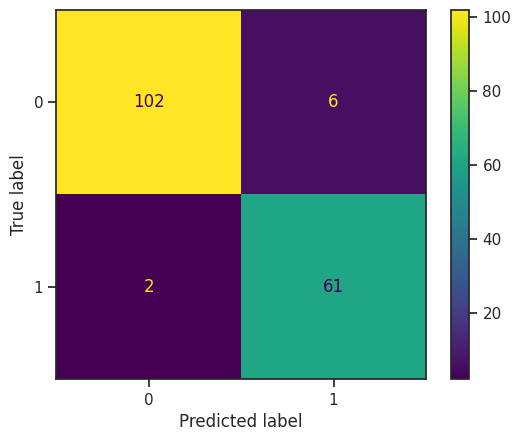

In [108]:
cm = confusion_matrix(y_test, abacate, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [109]:
TP = 61
TN = 102
FP = 6
FN = 2

In [110]:
acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100 # rambém chamadode SENSIBILIDADE

F1 = 2 * ( (precisao * recall) / (precisao + recall) )


print(f'Acurácia = {acurácia} Precisão = {precisao} Recall = {recall} F1 = {F1} ' )

Acurácia = 95.32163742690058 Precisão = 91.04477611940298 Recall = 96.82539682539682 F1 = 93.84615384615385 


In [111]:
acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100
acurácia

95.32163742690058

In [112]:
precisao = (TP / (TP + FP)) * 100
precisao

91.04477611940298

In [113]:
recall = (TP / (TP + FN)) *100 # rambém chamadode SENSIBILIDADE
recall

96.82539682539682

In [114]:
F1 = 2 * ( (precisao * recall) / (precisao + recall) )

F1

93.84615384615385

In [115]:
print(classification_report(y_test,abacate))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



#Regressão

In [116]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

melancia = model.predict(X_test)

In [117]:
melancia

array([0.03440429, 0.95932984, 0.95932984, 0.03071208, 0.03071208,
       0.95932984, 0.95932984, 0.71833286, 0.81750046, 0.03364434,
       0.04763003, 0.95932984, 0.05814935, 0.95932984, 0.03071208,
       0.95932984, 0.03750926, 0.03521667, 0.03071208, 0.95932984,
       0.18254502, 0.03220462, 0.95932984, 0.03521667, 0.04459331,
       0.35767279, 0.03071208, 0.04763003, 0.03071208, 0.95932984,
       0.04003718, 0.03071208, 0.03521667, 0.03364434, 0.03071208,
       0.03071208, 0.47814243, 0.03071208, 0.95932984, 0.04752557,
       0.03521667, 0.95430964, 0.04655642, 0.03071208, 0.81115525,
       0.03521667, 0.03071208, 0.04763003, 0.03521667, 0.03220462,
       0.95932984, 0.95932984, 0.28318314, 0.39440978, 0.03071208,
       0.03071208, 0.03440429, 0.95932984, 0.68213518, 0.03071208,
       0.03071208, 0.95932984, 0.95932984, 0.05056229, 0.03071208,
       0.04459331, 0.95932984, 0.94785991, 0.03071208, 0.03521667,
       0.94652706, 0.95932984, 0.03513688, 0.95932984, 0.04763

In [118]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [119]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

predict = model.predict(X_test)

In [120]:
predict

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

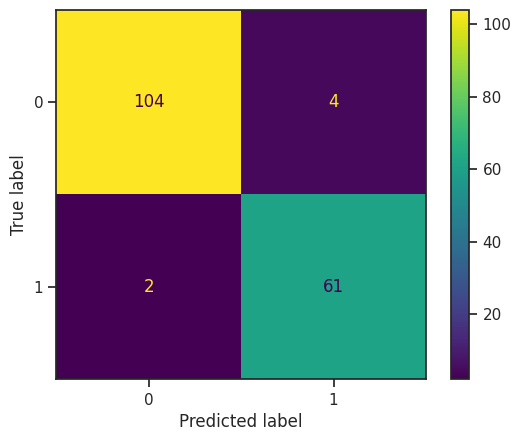

In [121]:
cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [122]:
cm

array([[104,   4],
       [  2,  61]])

In [123]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100 # rambém chamadode SENSIBILIDADE

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )

TP = 61 , TN = 104 , FP = 4 , FN = 2 
Acurácia = 96.49122807017544 , Precisão = 93.84615384615384 , Recall = 96.82539682539682 , F1 = 95.31249999999999 


In [124]:
df_Diag.columns

Index(['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
       'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
       'Target'],
      dtype='object')

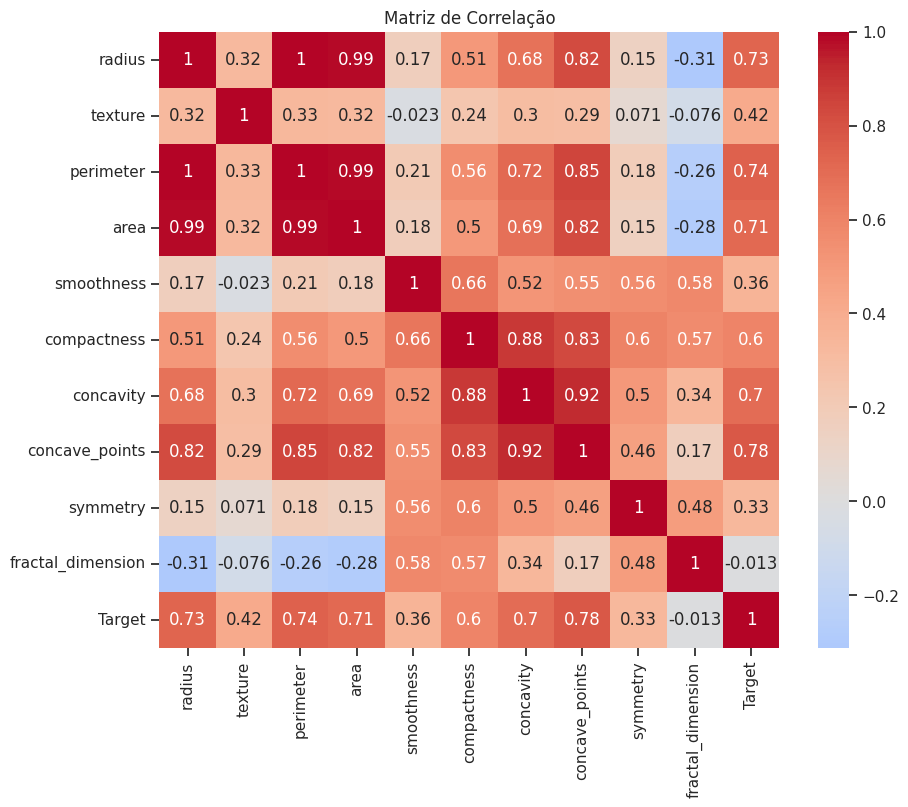

In [125]:
correlation_matrix = df_Diag.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

In [126]:
X = df_Diag.drop(columns = ['Target','radius','area','concavity','fractal_dimension'])

y = df_Diag.Target.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

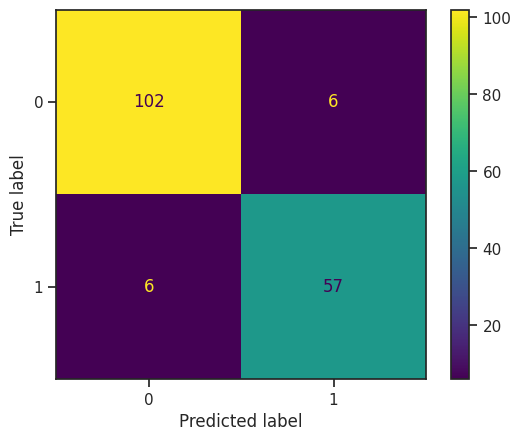

TP = 57 , TN = 102 , FP = 6 , FN = 6 
Acurácia = 92.98245614035088 , Precisão = 90.47619047619048 , Recall = 90.47619047619048 , F1 = 90.47619047619048 


In [127]:
model = RandomForestClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)

predict = model.predict(X_test)

cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100 # rambém chamadode SENSIBILIDADE

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )

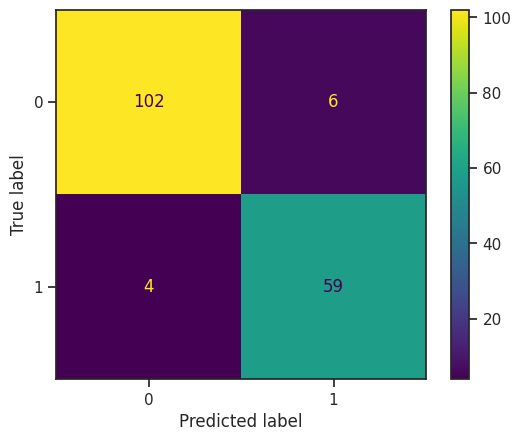

TP = 59 , TN = 102 , FP = 6 , FN = 4 
Acurácia = 94.15204678362574 , Precisão = 90.76923076923077 , Recall = 93.65079365079364 , F1 = 92.1875 


In [128]:
model = XGBClassifier()
model.fit(X_train, y_train)

predict = model.predict(X_test)

cm = confusion_matrix(y_test, predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

acurácia = ((TP + TN) / (TP + TN + FP + FN)) * 100

precisao = (TP / (TP + FP)) * 100

recall = (TP / (TP + FN)) *100 # rambém chamadode SENSIBILIDADE

F1 = 2 * ( (precisao * recall) / (precisao + recall) )

print(f'TP = {TP} , TN = {TN} , FP = {FP} , FN = {FN} ' )
print(f'Acurácia = {acurácia} , Precisão = {precisao} , Recall = {recall} , F1 = {F1} ' )